In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Grid Search

In [6]:
metrics = ["euclidean", "cosine"] #"brute" and "auto" were presenting the exact same results.
#leaf_size = [10, 20, 30, 40, 50] #all leaf sizes were prducing the same results
eps = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples = [100, 200, 300, 400, 500]

In [7]:
def grid_search(logs, labels_, gram, min_df):
     
    X = get_features(logs, gram, min_df)
    X = X.toarray()
    
    idxs = np.where(np.all(X == 0, axis=1))
    
    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)
    
    result_header = ["Metrics", "Eps", "Min Samples", "VMeasure", "Fowlkes-Mallows", "Clusters (No)"]
    results = []
    
    labels = []
    ls = 0
    
    for metric in metrics:
        for ep in eps:
            for min_s in min_samples:
                model = DBSCAN(eps=ep,min_samples=min_s,algorithm="auto",metric=metric)
                model.fit(X)

                labels = model.labels_

            #plt.figure()
            #plt.suptitle("DBSCAN(gram=%d,eps=%d,min_samples=%d,leaf_size=%d,algorithm=%s)" % (gram,ep,min_s,ls,alg), size=14)

                vm = evaluate_vmeasure(labels_, labels)
                fm = evaluate_fm(labels_, labels)

                lst1 = set(labels)

                result = [metric, ep, min_s, vm, fm, len(lst1)-1]
                results.append(result)
                tab_results(result_header, results) 

                
    tab_results(result_header, results)         
            

In [8]:
grid_search(logs, log_labels, 2, 70)

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
+-----------+-----+-------------+---------------------+---------------------+---------------+
+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
+-----------+-----+-------------+---------------------+-----

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.15388283251699583 | 0.48422766163875114 |       18      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.15565178744026775 | 0.46351061322226145 |       19      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

In [9]:
grid_search(logs, log_labels, 2, 100)

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
+-----------+-----+-------------+---------------------+---------------------+---------------+
+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
+-----------+-----+-------------+---------------------+-----

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16783801691473269 | 0.46558673011071255 |       21      |
| euclidean | 0.1 |     200     | 0.09530317631808681 |  0.5925848026912888 |       6       |
| euclidean | 0.1 |     300     | 0.06961885881231715 |  0.6659746931480056 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7721270742885648 |       0       |
| euclidean | 0.2 |     100     | 0.16856086826602612 | 0.43465873566014934 |       23      |
| euclidean | 0.2 |     200     | 0.10073801541753537 |  0.5734791276644887 |       7       |
| euclidean | 0.2 |     300     | 0.06961885881231715 |  0.6

In [10]:
grid_search(logs, log_labels, 3, 90)

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
+-----------+-----+-------------+---------------------+---------------------+---------------+
+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
+-----------+-----+-------------+---------------------+-----

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.1 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.1 |     300     | 0.06916861758140015 |  0.666931705841588  |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.773804975869987  |       0       |
| euclidean | 0.2 |     100     | 0.16142124691124332 | 0.46689149421359455 |       20      |
| euclidean | 0.2 |     200     | 0.09459288579685056 |  0.5929774820316028 |       6       |
| euclidean | 0.2 |     300     | 0.06916861758140015 |  0.6

In [11]:
grid_search(logs, log_labels, 3, 100)

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
+-----------+-----+-------------+---------------------+---------------------+---------------+
+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
+-----------+-----+-------------+---------------------+-----

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374 |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0         |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983 | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438 |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510374 |  0.6

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374  |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374  |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374  |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374  |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374  |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.1 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.1 |     300     | 0.06827409212510374  |  0.6688774387476042 |       3       |
| euclidean | 0.1 |     400     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.1 |     500     |         0.0          |  0.7769807885534478 |       0       |
| euclidean | 0.2 |     100     | 0.16754350191069983  | 0.46684142520218586 |       21      |
| euclidean | 0.2 |     200     | 0.09319809449106438  |  0.5939443674286983 |       6       |
| euclidean | 0.2 |     300     | 0.06827409212510

## Bigram Feature Vectorizer

In [12]:
eval_results = []

In [13]:
labels_ = log_labels

X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [14]:
model = DBSCAN(eps=0.4,min_samples=200,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(eps=0.4, metric='cosine', min_samples=200)

In [15]:
labels = model.labels_

In [16]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

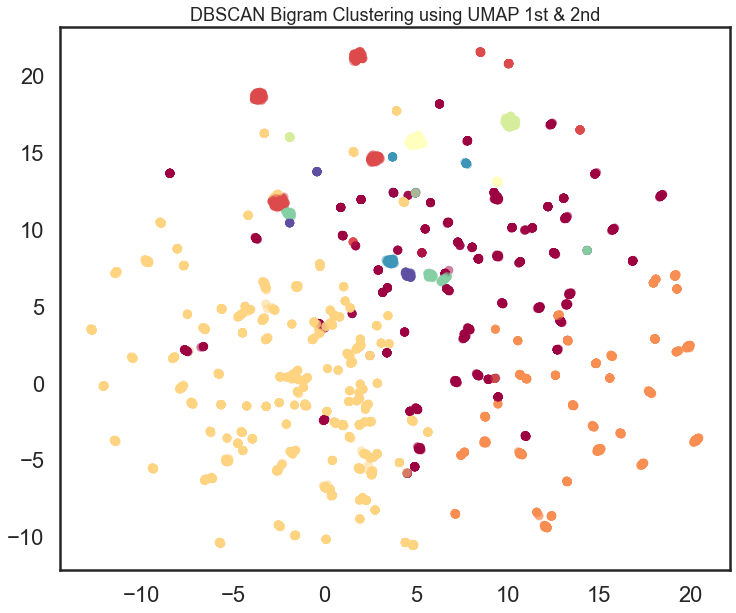

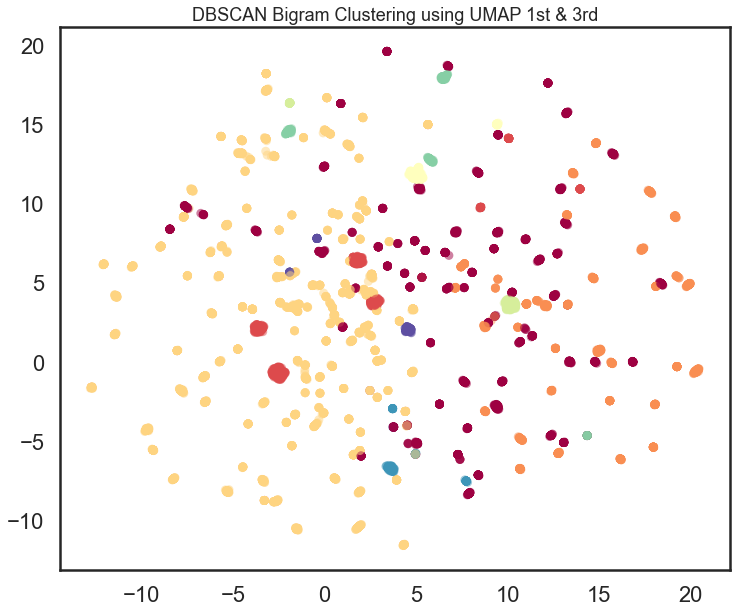

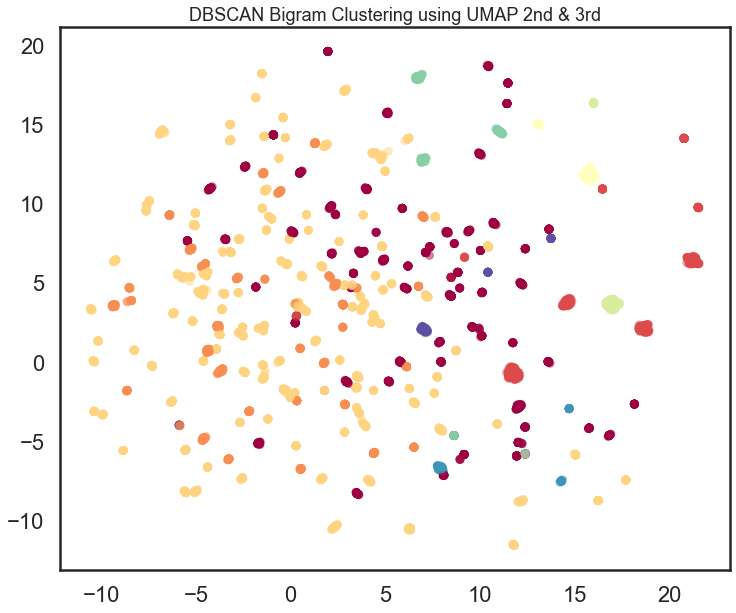

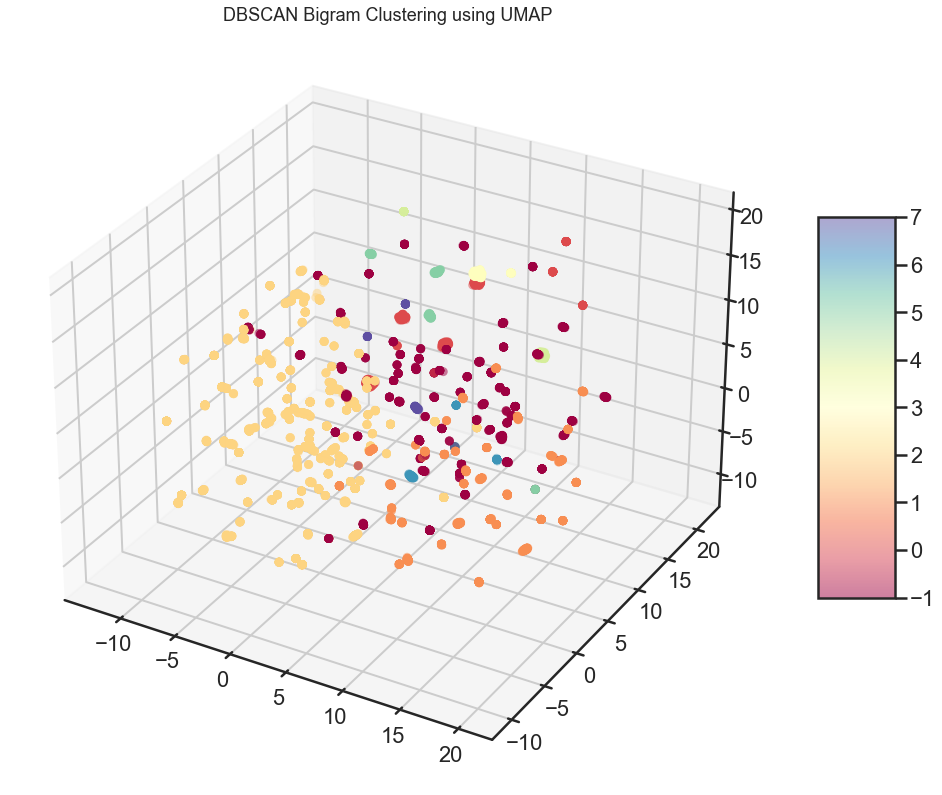

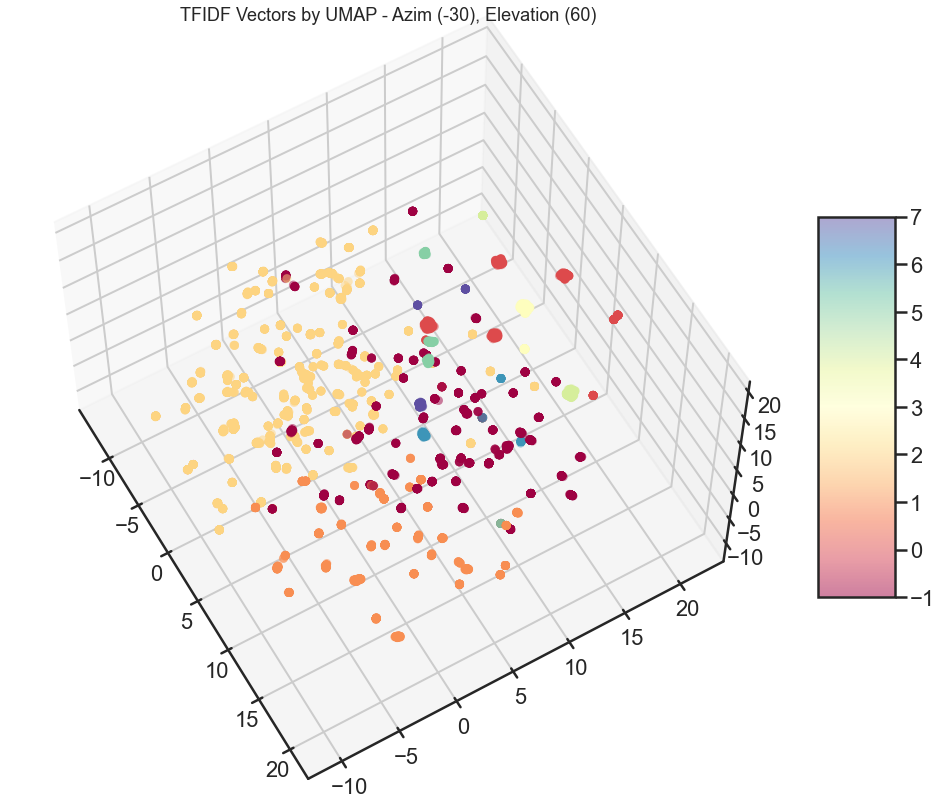

In [17]:
plot_clusters("DBSCAN Bigram Clustering using UMAP", X, labels)

In [18]:
results = evaluate_clustering('DBSCAN Bigram Clustering ', X, labels_, labels)
print(results)

['DBSCAN Bigram Clustering ', '0.36', '0.12', '0.18', '0.02', '0.18', '0.38']


In [19]:
eval_results.append(results)

In [20]:
np.count_nonzero(labels == -1)

2352

## Trigram Feature Vectorizer

In [21]:
labels_ = log_labels

X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [22]:
model = DBSCAN(eps=0.5,min_samples=100,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(metric='cosine', min_samples=100)

In [23]:
labels = model.labels_

In [24]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

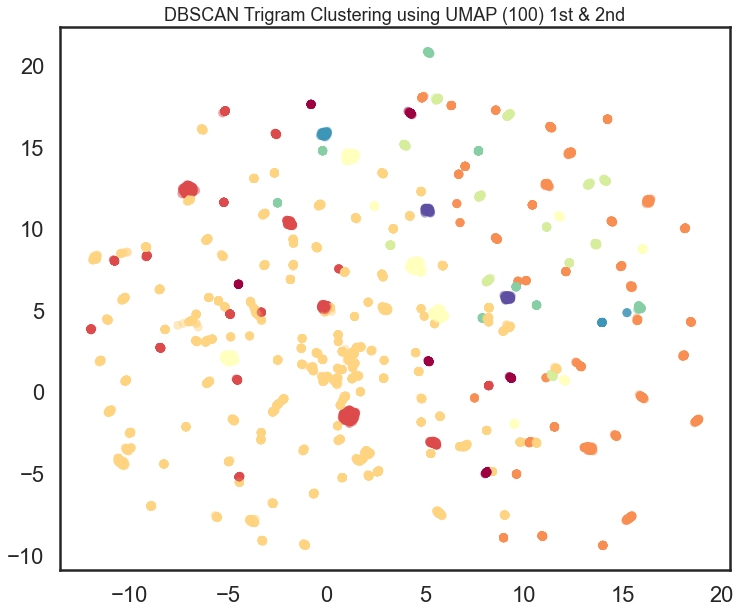

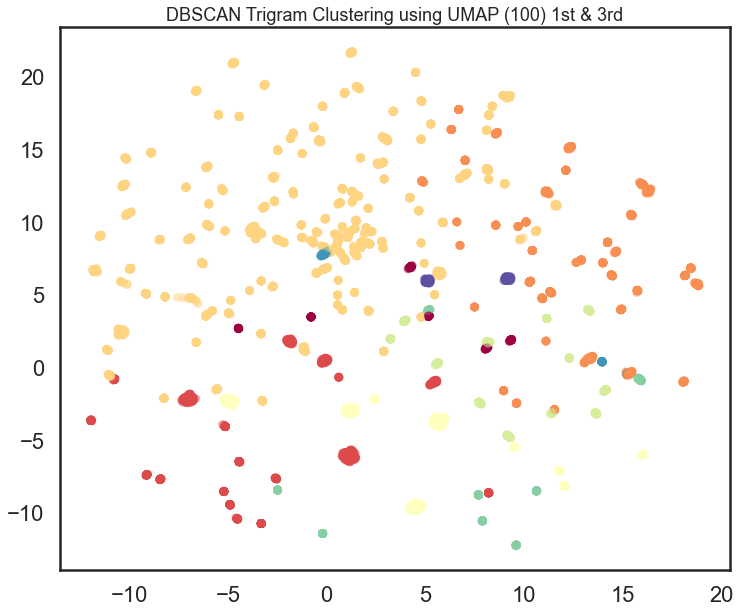

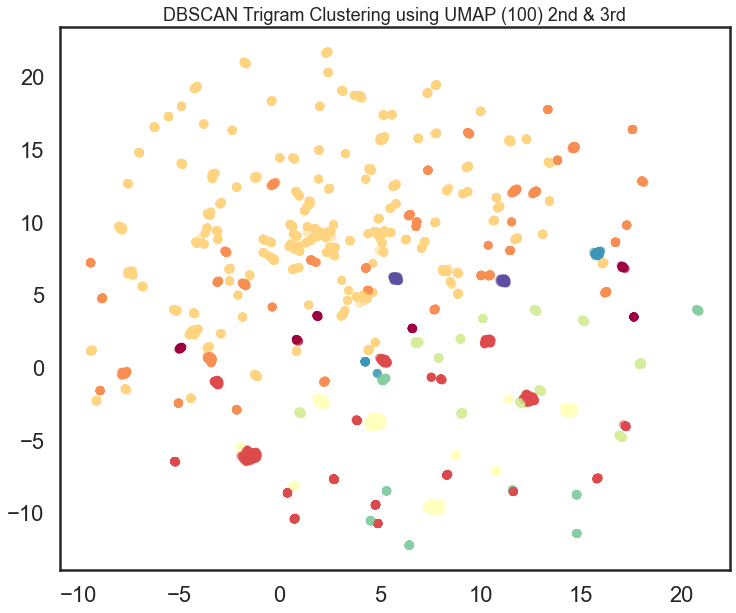

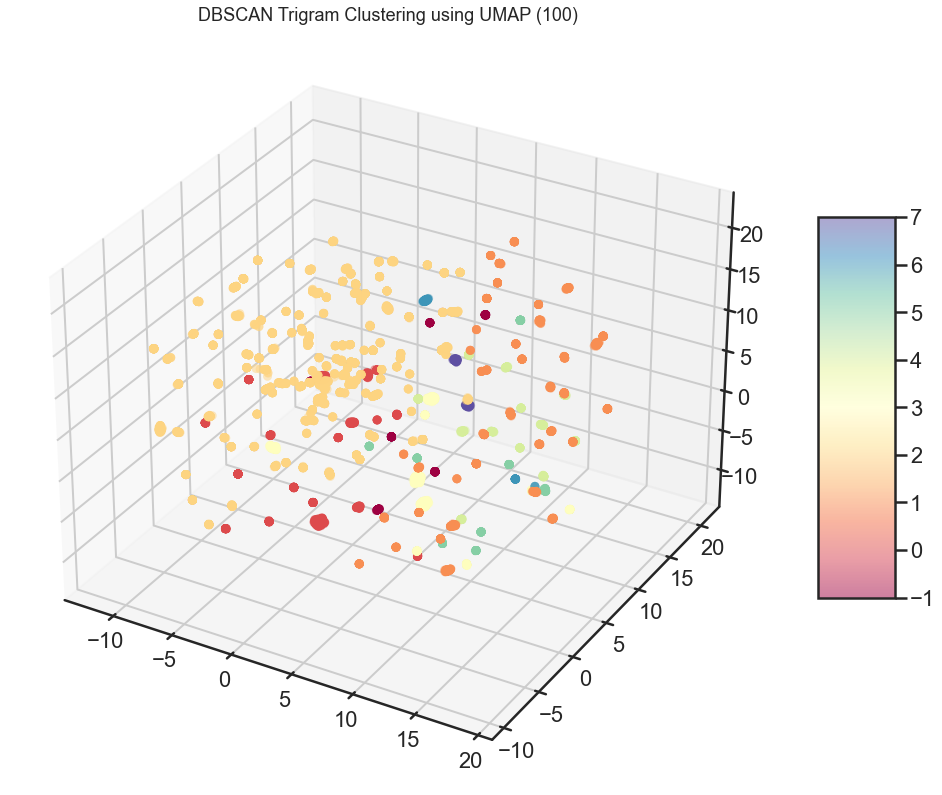

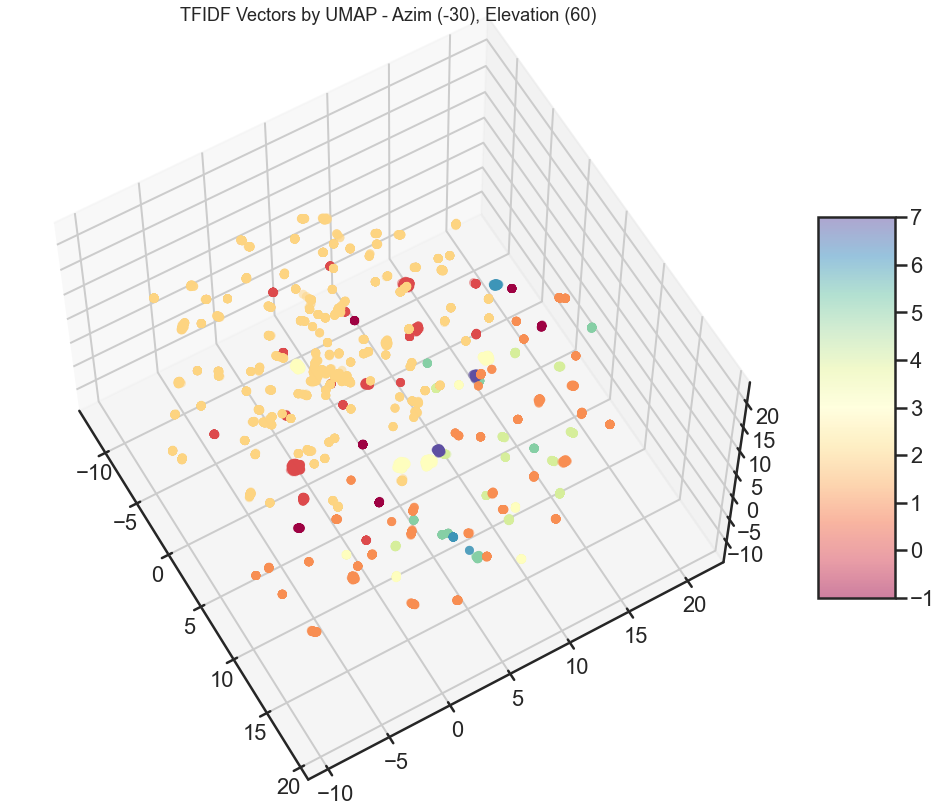

In [25]:
plot_clusters("DBSCAN Trigram Clustering using UMAP (100)", X, labels)

In [26]:
results = evaluate_clustering('DBSCAN Trigram Clustering (100)', X, labels_, labels)
print(results)

['DBSCAN Trigram Clustering (100)', '0.57', '0.19', '0.29', '0.09', '0.29', '0.44']


In [27]:
eval_results.append(results)

In [28]:
tabulate_results(eval_results)

+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|               Name              | Homogeneity | Completeness | V Measure | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|    DBSCAN Bigram Clustering     |     0.36    |     0.12     |    0.18   |      0.02      |        0.18       |       0.38      |
| DBSCAN Trigram Clustering (100) |     0.57    |     0.19     |    0.29   |      0.09      |        0.29       |       0.44      |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
